In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
#Generate(X,y ) dataSet with 100 lines and two features

In [8]:
(X,y)=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0) #dataset with 100 lignes 2 variabe 
y=y.reshape(y.shape[0],1)
print("dimension  de X",X.shape) #Verify X shape
print("dimension  de y",X.shape) #Verify Y shape

dimension  de X (100, 2)
dimension  de y (100, 2)


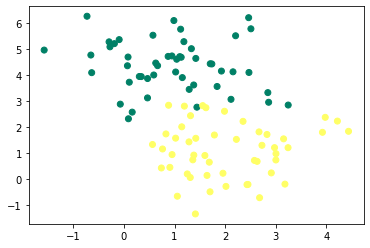

In [9]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.show()

In [10]:
#Initialize parameters W,b
def initialize(X):
  W=np.random.rand(X.shape[1],1)
  b=np.random.rand(1)
  return (W,b)




In [11]:
#Implement model
def model(X,W,b):
  Z=X.dot(W)+b
  A=1/(1+np.exp(-Z))
  return A

In [12]:
#Cost function
def log_loss(A,y):
  return 1/len(y) * np.sum(-y*np.log(A)-(1-y)*np.log2(1-A))


In [13]:
#calculate cost Gradients
def gradient_descent(A,X,y):
  dw=(1/len(y))*np.dot(X.T,A-y)
  db=(1/len(y))*np.sum(A-y)
  return (dw,db)



In [14]:
#Use gradients to update (W,b) to reduce the model error
def update(W,b,dw,db,learning_rate):
  W=W-learning_rate*dw
  b=b-learning_rate*db
  return (W,b)


In [15]:
def predict(X,W,b):
  A=model(X,W,b)
  return A>=0.5

In [16]:
#Implement Artificial neurone
def neurone(X,y,learning_rate=0.1,n_iter=100):
  W,b=initialize(X)
  loss=[] #empty list
  for i in range(n_iter):
      A = model(X,W,b)
      cost=log_loss(A,y)
      loss.append(cost)
      (dw,db)=gradient_descent(A,X,y)
      (W,b)=update(W,b,dw,db,learning_rate=0.1)
 
  y_pred=predict(X,W,b)
  print(accuracy_score(y,y_pred)) #Print accuracy
  plt.plot(loss)
  plt.show()
  return (W,b)



0.92


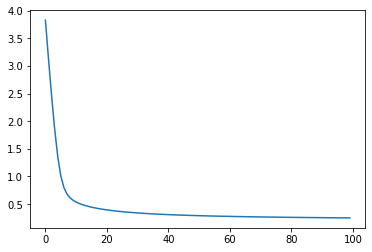

In [17]:
(W,b)=neurone(X,y) #Train model

In [18]:
#All seems correct ,error is converging to ~0.3

In [19]:
W #Verify W

array([[ 0.94111528],
       [-1.09886334]])

In [20]:
b #Verify bias

array([1.16860079])

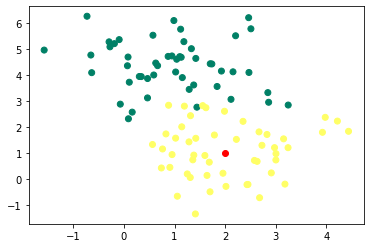

In [21]:
#Create test plant (the red one),and plot it with dataSet
test_plant=np.array([2,1])
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')
plt.scatter(test_plant[0],test_plant[1],c='r')
plt.show()

In [22]:
#Predict test_plant class
predict(test_plant,W,b)

array([ True])

In [ ]:
#predition is correct,test_plant is toxic